In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [133]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score
from nltk.stem.snowball import SnowballStemmer


In [134]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 8000)
#pd.set_option('display.width', 1000)

In [135]:
data = pd.read_csv("../input/sms-spam-collection-dataset/spam.csv", 
                   encoding='latin1')

In [136]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [137]:
print(data.shape)
#data.isnull().sum()

(5572, 5)


In [138]:
X= data["v2"]
y=data["v1"]


In [139]:
def remove_punctuation(text):   
   # replacing the punctuations with no space, which in effect deletes the punctuation marks 
   translator = str.maketrans('', '', string.punctuation)   
   return text.translate(translator)

sw = stopwords.words('english')
np.array(sw)

def stopwords(text):   
   text = [word.lower() for word in text.split() if word.lower() not in sw]   
   return " ".join(text)

def stemming(text): 
    stemmer = SnowballStemmer("english")
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)


In [140]:
X = X.apply(remove_punctuation)
X = X.apply(stopwords)
X = X.apply(stemming)


In [141]:
data["v2"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [142]:
X

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                              ì b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

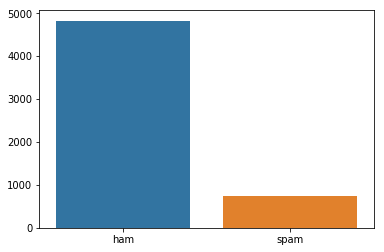

In [143]:
sns.barplot(y.value_counts().index, y.value_counts().values)

In [144]:
dict_y = {'ham':1,'spam':1}
y = y.map(dict_y)
y = y.values.reshape(-1,1)

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify = y)
print(x_train.shape)
print(x_test.shape)


(4457,)
(1115,)


## CountVectorizer

In [146]:
cv13 = CountVectorizer(stop_words='english'
                     ,ngram_range=(1,3)
                     ,max_df=0.8,lowercase=False)

#cv13 = CountVectorizer()

x_train_cv_13 = cv13.fit_transform(x_train)
x_test_cv_13 = cv13.transform(x_test)


In [147]:
x_train_cv_13.toarray()
#print(cv13.get_feature_names())
tokens = cv13.get_feature_names()

In [148]:
def wm2df(wm, feat_names):   
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)
wm2df(x_train_cv_13, tokens).tail()

,008704050406,008704050406 sp,0121,0121 2025050,0121 2025050 visit,01223585334,01223585334 cum,01223585334 cum wan,0125698789,0125698789 ring,0125698789 ring ur,02,02 user,02 user today,020603,020603 2nd,020603 2nd attempt,0207,0207 153,0207 153 9153,0207 153 9996,02070836089,02072069400,02072069400 bx,02072069400 bx 526,02073162414,02073162414 cost,02073162414 cost 20pmin,02085076972,02085076972 repli,02085076972 repli stop,020903,020903 2nd,020903 2nd attempt,021,021 3680,021 3680 subject,021 3680offer,021 3680offer end,050703,050703 tcsbcm4235wc1n3xx,050703 tcsbcm4235wc1n3xx callcost,06,06 good,06 good luck,060505,061104,07008009200,07090201529,07090298926,07090298926 reschedul,07090298926 reschedul ref9307622,071104,07123456789,07123456789 87077,07123456789 87077 yahoo,0721072,07732584351,07732584351 rodger,07732584351 rodger burn,07734396839,07734396839 ibh,07734396839 ibh custom,07742676969,07742676969 786,07742676969 786 unredeem,07753741225,07753741225 800,07753741225 800 unredeem,0776xxxxxxx,0776xxxxxxx uve,0776xxxxxxx uve invit,07786200117,077xxx,077xxx 2000,077xxx 2000 bonus,078,07801543489,07801543489 guarante,07801543489 guarante latest,07808,07808 xxxxxx,07808 xxxxxx 800,07808247860,07808247860 800,07808247860 800 unredeem,07815296484,07815296484 800,07815296484 800 unredeem,07821230901,0784987,0784987 786,0784987 786 unredeem,0789xxxxxxx,0789xxxxxxx today,0789xxxxxxx today lucki,0796xxxxxx,0796xxxxxx today,0796xxxxxx today ur,07973788240,07973788240 800,07973788240 800 unredeem,07xxxxxxxxx,07xxxxxxxxx 2000,07xxxxxxxxx 2000 bonus,0800,0800 0721072,0800 169,0800 169 6031,0800 18,0800 18 legitimat,0800 195,0800 195 6669,0800 1956669,0800 1956669 text,0800 505060,0800 505060 place,0800 542,0800 542 0825,08000407165,08000407165 18,08000407165 18 stop,08000776320,08000776320 repli,08000776320 repli deliveri,08000839402,08000839402 2optout,08000839402 2stoptx,08000839402 2stoptxt,08000839402 call2optout4qf2,08000839402 call2optoutf4q,08000839402 call2optouthf8,08000839402 call2optoutn9dx,08000839402 call2optoutyhl,08000839402 or2optouthv9d,08000930705,08000930705 del,08000930705 del thur,08000930705 deliveri,08000930705 deliveri tomorrow,08000930705 free,08000930705 free deliveri,08000938767,08000938767 updat,08000938767 updat or2stoptxt,08001950382,08001950382 2optoutd3wv,08001950382 call2optout674,08001950382 call2optoutj,08001950382 call2optoutj mf,08002888812,08002888812 repli,08002888812 repli deliveri,08002986030,08002986906,08006344447,08006344447 claim,08006344447 claim guarante,0808,0808 145,0808 145 4742,08081263000,08081263000 charg,08081263000 charg refundedthi,08081560665,08081560665 speak,08081560665 speak live,0825,0844,0844 861,0844 861 85,08448350055,08448350055 bt,08448350055 bt line,08448714184,08448714184 stoptxt,08448714184 stoptxt stop,0845,0845 021,0845 021 3680,0845 021 3680offer,0845 2814032,0845 2814032 16,08450542832,08452810071,08452810071 16,08452810073,08452810073 18,08452810075over18,0870,0870 chatlin,0870 chatlin inclu,0870 nation,0870 nation rate,08700621170150p,08700621170150p msg,08700621170150p msg repli,08701213186,08701237397,08701237397 16,08701237397 16 club,08701417012,08701417012 profit,08701417012 profit chariti,0870141701216,0870141701216 norm,0870141701216 norm 4txt120p,087016248,08701752560,08701752560 450p,08701752560 450p day,087018728737,087018728737 nation,087018728737 nation rate,0870241182716,0870241182716 3wk,08702490080,08702490080 tell,08702490080 tell 09066358152,08702840625,08702840625 comuk220cm2,08702840625 comuk220cm2 9ae,08702840625comuk,08702840625comuk 220cm2,08702840625comuk 220cm2 9ae,08704439680,08704439680 book,08704439680 book quot,08704439680tscs,08704439680tscs appli,08706091795,0870737910216yr,0870737910216yr 150wk,08707500020,08707500020 20p,08707500020 20p min,08707509020,08707509020 20p,08707509020 20p min,08708034412,08709222922,08709222922 nation,08709222922 nation rate,08709501522,08709501522 savamob,08709501522 savamob pobox,0870k,08710471114

In [149]:
print('Vocabulary len:', len(cv13.get_feature_names()))
print('Longest word:', max(cv13.vocabulary_, key=len))

Vocabulary len: 52241
Longest word: httptms widelivecomindex wmlid1b6a5ecef91ff937819firsttrue180430jul05


In [150]:
x_train_cv_13.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [151]:
def NB_Call(x_train, y_train, x_test, y_test):
    model_nb = MultinomialNB(alpha=0.1)
    model_nb.fit(x_train, y_train.ravel())
    y_predict = model_nb.predict(x_test)
    print(model_nb.score(x_test,y_test))
    print(accuracy_score(y_test, y_predict) * 100)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)

In [152]:
NB_Call(x_train_cv_13,y_train, x_test_cv_13, y_test)

1.0
100.0
[[1115]]


### TF-Idf

In [153]:
# tfidf = TfidfVectorizer(max_features=1000, 
#                         lowercase=True, 
#                         analyzer='word',
#                         stop_words= 'english',ngram_range=(1,1))

#tfidf = TfidfVectorizer(min_df=3)

tfidf = TfidfVectorizer(min_df=5, ngram_range=(1, 3))
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.transform(x_test)

tokens = tfidf.get_feature_names()
wm2df(x_train_tf, tokens).tail()
print('Vocabulary len:', len(tfidf.get_feature_names()))
print('Longest word:', max(tfidf.vocabulary_, key=len))


Vocabulary len: 2035
Longest word: log onto httpwwwurawinnercom


In [154]:
NB_Call(x_train_tf,y_train, x_test_tf, y_test)

1.0
100.0
[[1115]]
